# Linear Regression First problem with single variable

Text(0.5,1,'Iters vs cost')

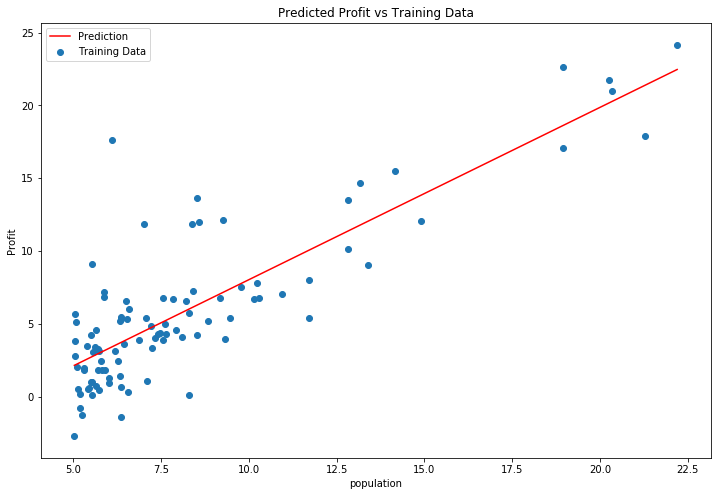

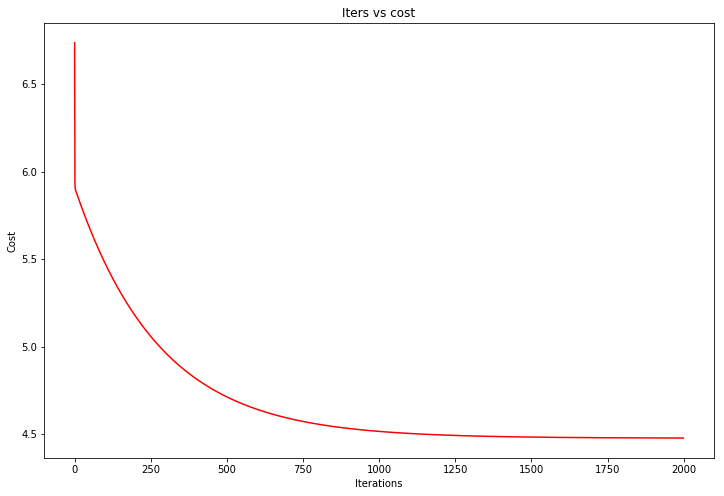

In [122]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

def computeCost(X,y,theta):
    inner = np.power(((X*theta.T) - y),2)
    return np.sum(inner)/(2*len(X))

path = os.getcwd() + '/git/data/ex1data1.txt'

data = pd.read_csv(path,names=["population","profit"])
#data.plot(kind = 'scatter', x = 'population', y = 'profit', figsize = (12,8))

data.insert(0, 'Ones', 1)
cols = data.shape[1]


X = data.iloc[:,0:cols-1]  
y = data.iloc[:,cols-1:cols]
X = np.matrix(X.values)  
y = np.matrix(y.values)


theta = np.matrix(np.array([0,0]))
j = computeCost(X,y,theta)
j
# this defination of gradient descent can computer linear regression for multiple fearures
def gradientDescent(X,y,theta,aplha,iters):
    
    temp = np.matrix(np.zeros(theta.shape))
    num_parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        
        error = X*theta.T -y
        for j in range(num_parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - (alpha/len(X))*np.sum(term)
            
            theta = temp
            cost[i] = computeCost(X,y,theta)
    return theta,cost

alpha = 0.01
iters = 2000


min_theta, cost = gradientDescent(X,y,theta,alpha,iters)

x = np.linspace(data.population.min(), data.population.max(),100)

line = min_theta[0,0] + (min_theta[0,1]*x)

fig, ax = plt.subplots(figsize = (12,8))
ax.plot(x,line ,'r', label = 'Prediction')
ax.scatter(data.population, data.profit, label = 'Training Data')
ax.legend(loc=2)  
ax.set_xlabel("population")
ax.set_ylabel("Profit")
ax.set_title("Predicted Profit vs Training Data")

fig, ax = plt.subplots(figsize = (12,8))
ax.plot(np.arange(iters),cost ,'r')
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
ax.set_title("Iters vs cost")

# Linear Regression Second Problem With Multiple Features

Text(0.5,1,'Iteration vs cost Epoch')

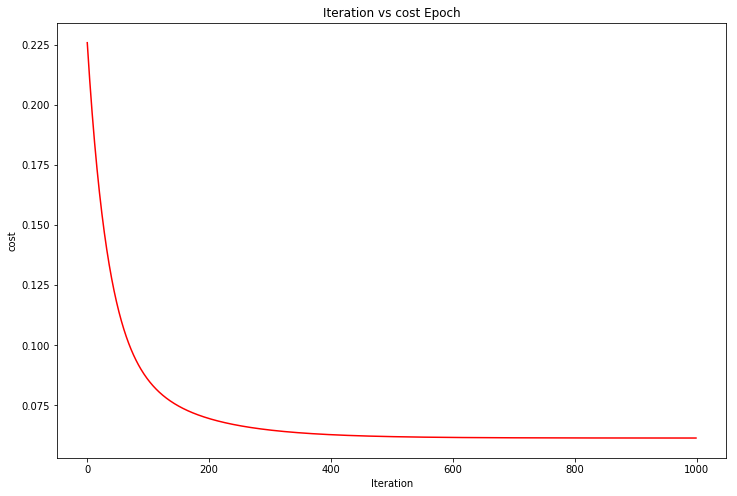

In [121]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

def computeCost(X,y,theta):
    inner = np.power(((X*theta.T)- y), 2)
    return np.sum(inner)/(2*len(x))
path = os.getcwd() + '/git/data/ex1data2.txt'

data2 = pd.read_csv(path, header = None , names = ['Size','Bedrooms','Price'])
data2 = (data2 - data2.mean())/data2.std()

def gradientDescent(X,y,theta,alpha,iters):
    temp = np.matrix(np.zeros(theta.shape))
    num_parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    for i in range(iters):
        
        error = X*theta.T - y
        
        for j in range(num_parameters):
            
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - (alpha/len(X))*np.sum(term)
            theta = temp
            cost[i] = computeCost(X,y,theta)
    return theta,cost
data2.insert(0, 'Ones', 1)
cols = data2.shape[1]
X2 = data2.iloc[:, 0:cols-1]
y2 = data2.iloc[:,cols-1:cols]

X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.array([0,0,0]))

alpha2 = 0.01
iters2 = 1000


min_theta2, cost2 = gradientDescent(X2,y2,theta2,alpha2,iters2)

fig ,ax = plt.subplots(figsize = (12,8))
ax.plot(np.arange(iters2),cost2, 'r')
ax.set_xlabel("Iteration")
ax.set_ylabel("cost")
ax.set_title("Iteration vs cost Epoch")


